Loadind and first look

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv')

Basic dataset information

In [4]:
df.shape

(102, 8)

In [5]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [6]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


Data Quality Assessment

check data type and missing values

In [7]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [8]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


chech for duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

Basic statics

In [12]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


data processing

clean column names

In [13]:
df.columns=df.columns.str.strip()

convert entry column to datetime

In [16]:
df['Entry_Date']=pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_Year']=df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [18]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_Year,int32


Create valuation growth metric

In [19]:
df['Valuation_Growth']=df['Valuation ($B)'] / df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


Extract number of investor

In [22]:
df['Investor_Count']=df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,4


Univariate Analysis

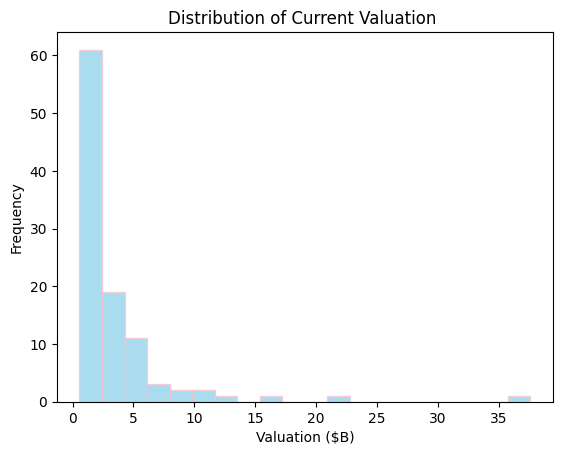

In [25]:
plt.hist(df['Valuation ($B)'],bins=20,alpha=0.7,color='skyblue',edgecolor='pink')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.title('Distribution of Current Valuation ')
plt.show()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Corrected import
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sector distibution


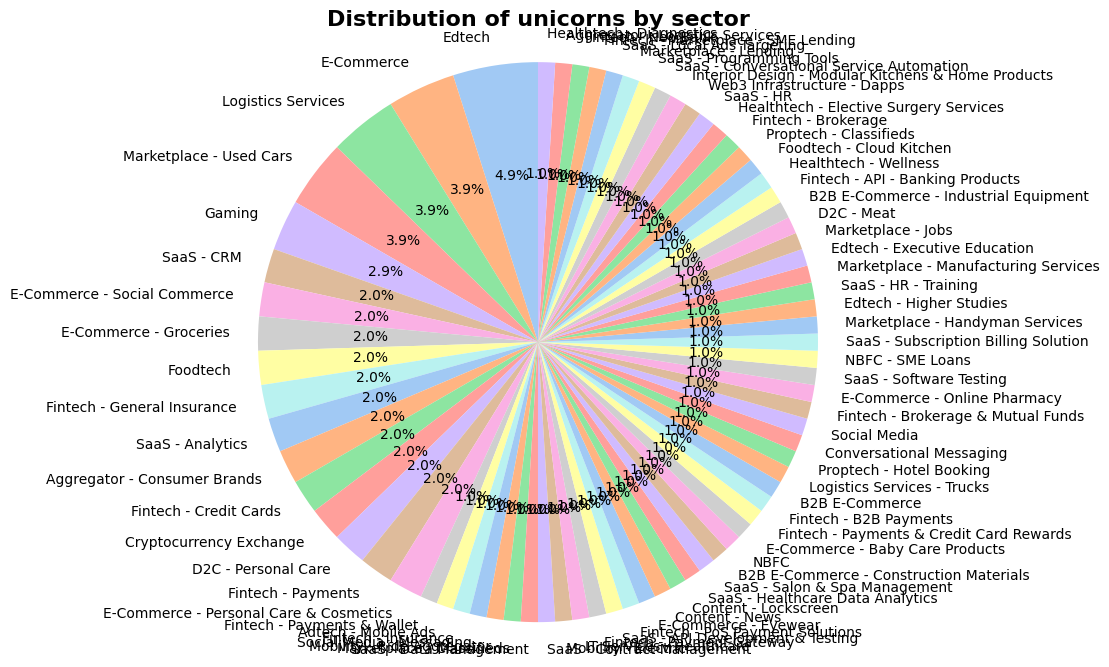

In [30]:
plt.figure(figsize=(12,8))
sector_counts=df['Sector'].value_counts()
colors = sns.color_palette('pastel')[0:len(sector_counts)] # Define colors here
plt.pie(sector_counts.values,labels=sector_counts.index,colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of unicorns by sector',fontsize=16,fontweight='bold')
plt.axis('equal')
plt.show()

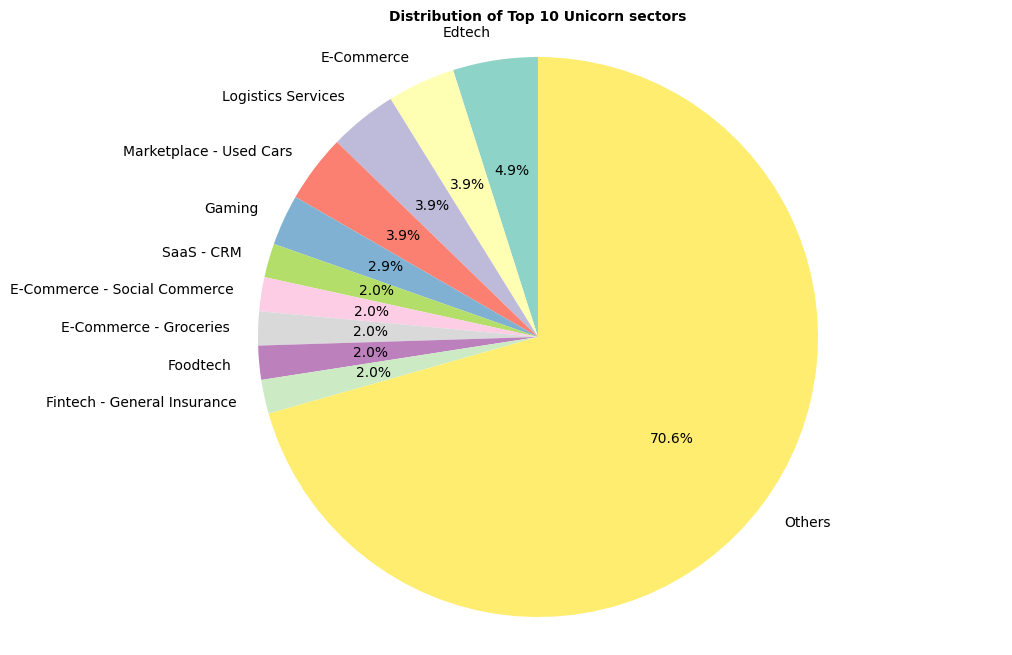

In [33]:
def display_top_k_sectors(df,k):
  sector_counts=df['Sector'].value_counts()

  # Select top K sectors and group the rest as 'Others'
  if k<len(sector_counts):
    top_sectors=sector_counts.head(k)
    other_sectors_count=sector_counts.iloc[k:].sum()
    top_sectors['Others']=other_sectors_count
  else:
    top_sectors=sector_counts

  plt.figure(figsize=(12,8))
  colors=plt.cm.Set3(np.linspace(0,1,len(top_sectors)))
  plt.pie(top_sectors.values,labels=top_sectors.index,autopct='%1.1f%%',colors=colors,startangle=90)
  plt.title(f'Distribution of Top {k} Unicorn sectors',fontsize=10,fontweight='bold')
  plt.axis('equal')
  plt.show()

# Call the function with K=5 to display top 5 Sectors
display_top_k_sectors(df,10)

Top sectors bar chart

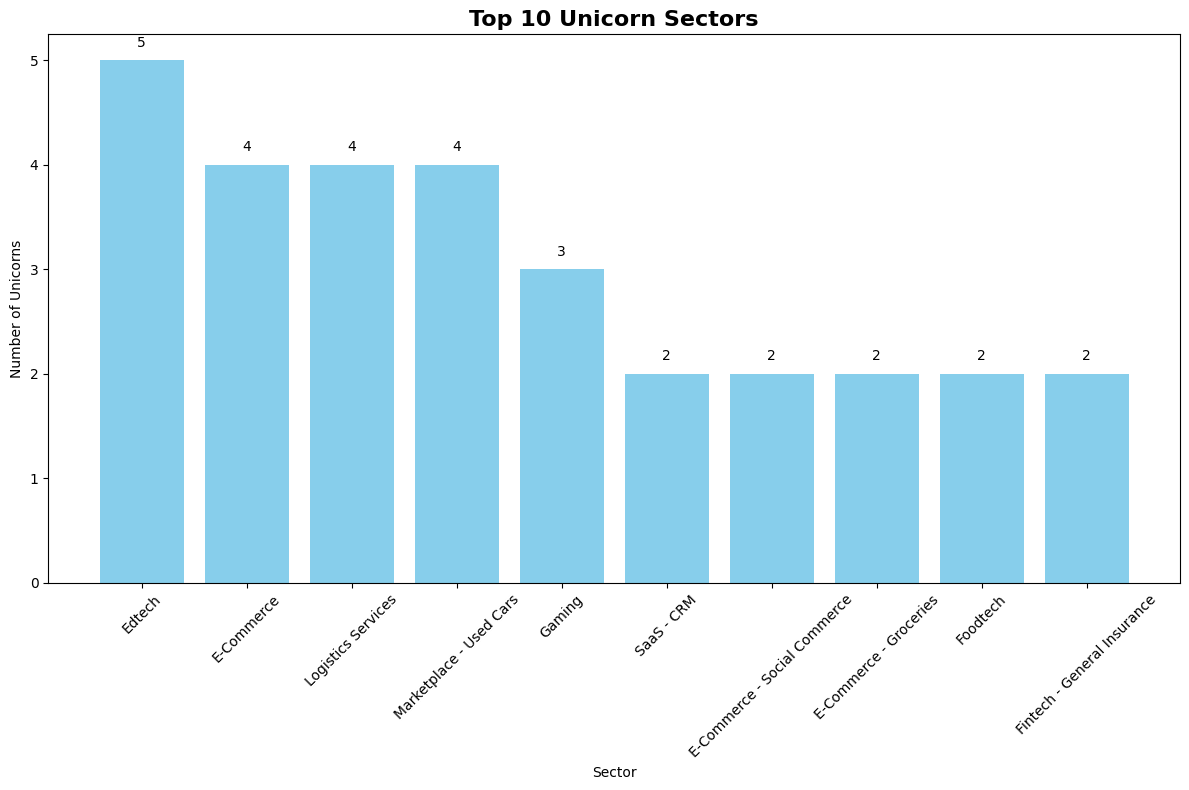

In [34]:
plt.figure(figsize=(12,8))
top_sectors=sector_counts.head(10)
bars=plt.bar(range(len(top_sectors)),top_sectors.values,color='skyblue')
plt.title('Top 10 Unicorn Sectors',fontsize=16,fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)),top_sectors.index,rotation=45,ha='center')
#Add value  label on bars
for bar,value in zip(bars,top_sectors.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
 #Geograpphic disribution

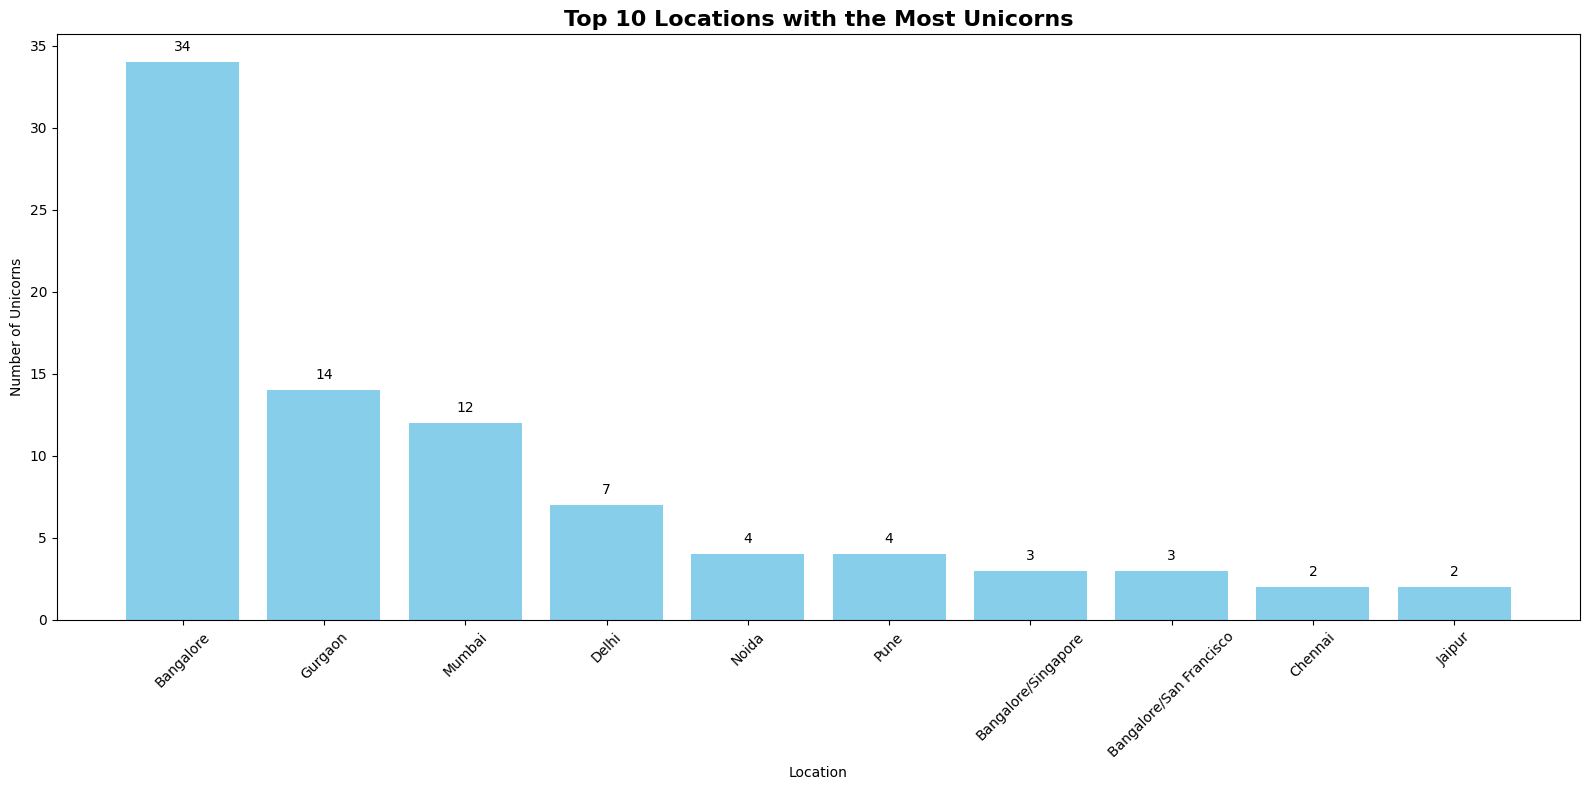

In [37]:
plt.figure(figsize=(16,8))
country_counts=df['Location'].value_counts().head(10)
bars=plt.bar(country_counts.index,country_counts.values,color='skyblue')
plt.title('Top 10 Locations with the Most Unicorns',fontsize=16,fontweight='bold')
plt.xlabel('Location')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)
#Add value labels
for bar,values in zip(bars,country_counts.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.5,str(values),ha='center',va='bottom')
plt.tight_layout()
plt.show()

create summary table

In [41]:
city_summary=df.groupby('Location').agg({
    'Valuation ($B)':['count','sum','mean'],
    'Entry_Year':['min','max']

}).round(2)
city_summary.columns=['count','Toatal_Valuation','Avg_Valuation','First_Year','Last_Year']
display(city_summary.head(10))

,count,Toatal_Valuation,Avg_Valuation,First_Year,Last_Year
Location,,,,,
Bangalore,34,134.80,3.96,2015,2022
Bangalore/Chicago,1,1.50,1.50,2013,2013
Bangalore/San Francisco,3,8.30,2.77,2020,2021
Bangalore/Singapore,3,40.60,13.53,2011,2020
Chennai,2,2.70,1.35,2021,2022
Chennai/Palo Alto,1,2.50,2.50,2022,2022
Chennai/San Francisco,1,3.50,3.50,2021,2021
Chennai/San Mateo,1,3.50,3.50,2018,2018
Delhi,7,15.53,2.22,2014,2022


Temporal Analysis

Entry Year trends

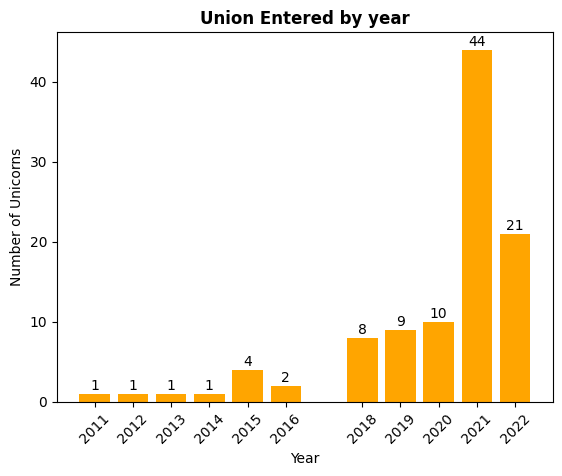

In [44]:
yearly_entries=df['Entry_Year'].value_counts().sort_index()
bars=plt.bar(yearly_entries.index,yearly_entries.values,color='orange')
plt.title('Union Entered by year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=45)
#Add value labels
for bar,values in zip(bars,yearly_entries.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(values),ha='center',va='bottom')
plt.show()

cummulative unicorns

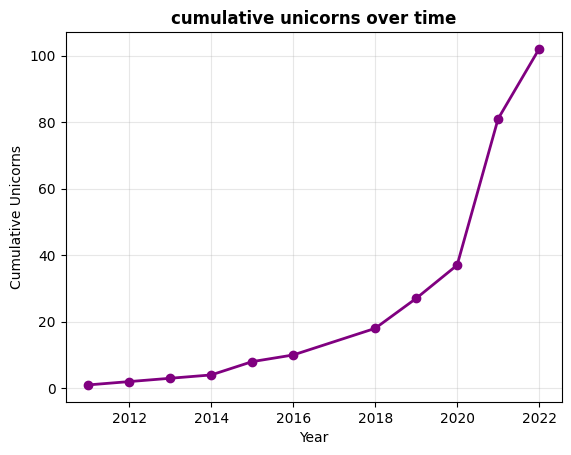

In [46]:
cumulative=yearly_entries.cumsum()
plt.plot(cumulative.index,cumulative.values,marker='o',linewidth=2,linestyle='-',color='purple')
plt.title('cumulative unicorns over time',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Unicorns')
plt.grid(True,alpha=0.3)
plt.show()

Average valuation by year

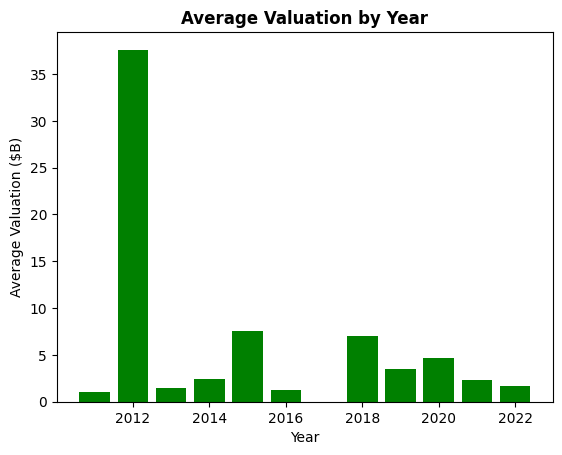

In [48]:
avg_val_by_year=df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='green')
plt.title('Average Valuation by Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.show()

sector  evolution over time

In [54]:
def display_k_sector_evolution(df,k):
  #Group by year and sector ,count occurrences
  sector_year=df.groupby(['Entry_Year','Sector']).size().unstack(fill_value=0)
  #Select top k sectors based on overall count
  top_k_sectors_names=df['Sector'].value_counts().head(k).index.tolist()
  sector_year=sector_year[top_k_sectors_names]
  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',alpha=0.7,ax=plt.gca())
  plt.title(f'Top {k} Sectors Over Time',fontweight='bold')
  plt.xlabel('Year')
  plt.ylabel('Number of Unicorns')
  plt.legend(title='Sector',bbox_to_anchor=(1.05,1),loc='upper left')
  plt.yticks(range(0,sector_year.values.max()+5))
  plt.grid(True,alpha=0.3)
  plt.tight_layout()
  plt.show()

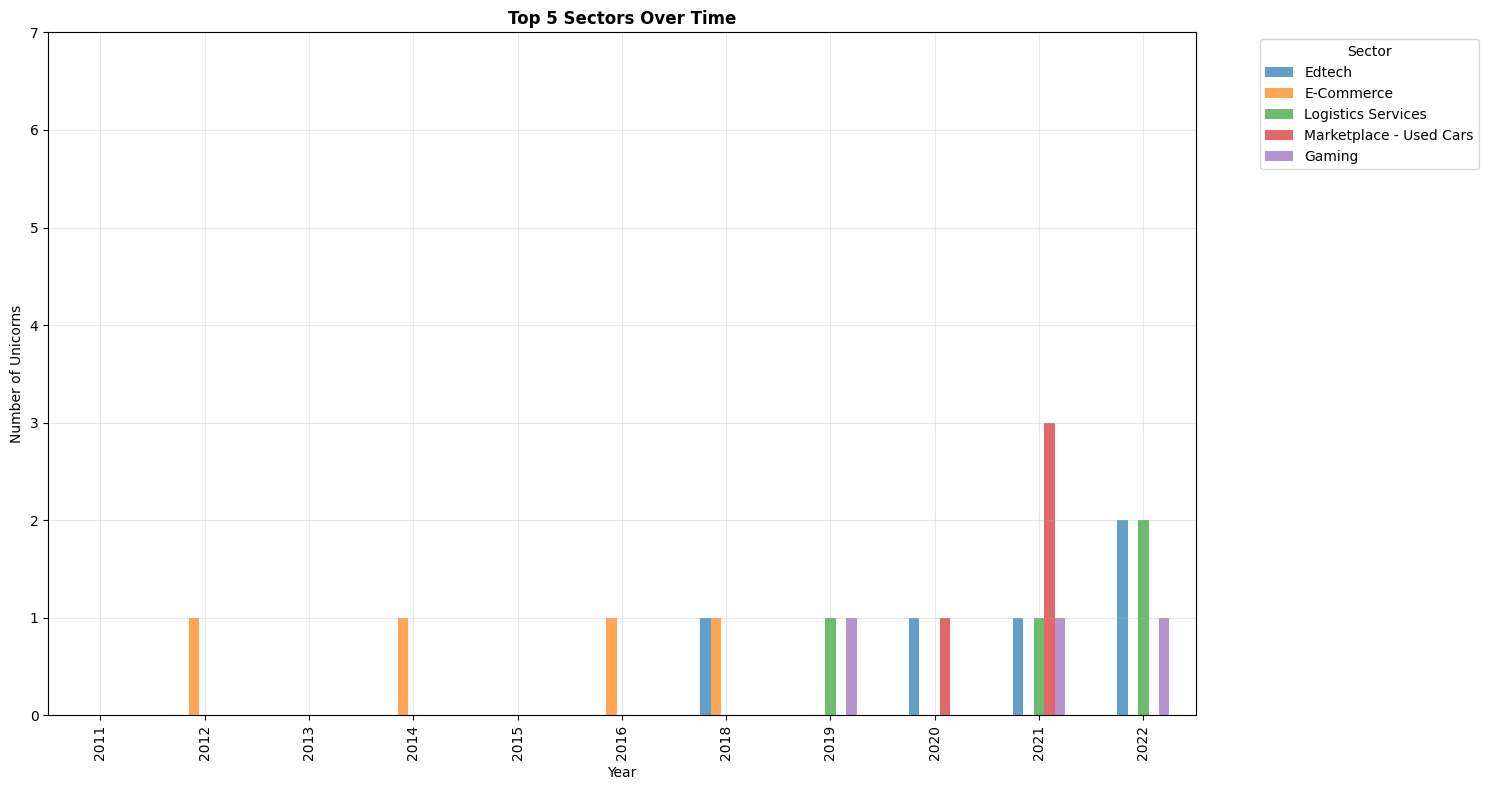

In [55]:
#call the function with k=5
display_k_sector_evolution(df,5)